In [6]:
#!pip install scikeras==0.13.0


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# For model evaluation
#import optuna
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split,KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, log_loss, brier_score_loss

# For ML models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
import lightgbm as lgb

# For deep learning
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# !pip install tensorflow  # Uncomment if TensorFlow is not installed
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, LSTM, Input ,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)



In [7]:
import pandas as pd
import numpy as np

# Load your dataset (update path if needed)
data = pd.read_csv("/kaggle/input/credit-score-data/credit_risk_dataset_200k.csv")

# 1. Age: clip to 21–69
data["Age"] = data["Age"].clip(21, 69)

# 2. Gender: 0=male, 1=female (63% male)
data["Gender"] = np.random.choice([0, 1], size=len(data), p=[0.63, 0.37])

# 3. Marital_Status: 0=married, 1=unmarried, 2=divorced, 3=widow
data["Marital_Status"] = np.random.choice(
    [0, 1, 2, 3], size=len(data), p=[0.73, 0.15, 0.07, 0.05]
)

# 4. Dependents: 31% have children (1–3), 69% have none
data["Dependents"] = np.where(
    np.random.rand(len(data)) < 0.31,
    np.random.randint(1, 4, size=len(data)),
    0
)

# 5. Household_Size: {1:22%, 2:50%, 3:18%, 4:9%, 5+:1%}
data["Household_Size"] = np.random.choice(
    [1, 2, 3, 4, 5], size=len(data),
    p=[0.22, 0.50, 0.18, 0.09, 0.01]
)

# 6. Education_Level: 0=junior HS, 1=senior HS, 2=bachelor+
data["Education_Level"] = np.random.choice(
    [0, 1, 2], size=len(data), p=[0.76, 0.03, 0.21]
)

# 7. Home_Ownership: 0=own, 1=parent, 2=rent
data["Home_Ownership"] = np.random.choice(
    [0, 1, 2], size=len(data), p=[0.88, 0.06, 0.06]
)

# Save updated dataset
#data.to_csv("credit_risk_dataset_200k_updated.csv", index=False)
print("✅ Dataset updated and saved as credit_risk_dataset_200k_updated.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/credit-score-data/credit_risk_dataset_200k.csv'

In [8]:
data= pd.read_csv("credit_risk_dataset_200k_updated.csv")

In [9]:
data.describe()

,Age,Gender,Marital_Status,Education_Level,Employment_Status,Occupation,Annual_Income,Monthly_Income,Household_Size,Dependents,...,Installment_Purchase_Count,Avg_UPI_Transactions,UPI_Count,Avg_Monthly_UPI_Transaction_Value,Utility_Bill_Payment_Timeliness,SIM_Swap_History,No_of_Devices_Linked,Geo_Location_Variance_Score,Credit_Score,Probability_Not_Default
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,40.271065,0.370430,0.443795,0.449345,1.497220,2.497020,56605.864320,4717.155377,2.172715,0.621865,...,4.507500,25.019775,5.004900,580.927882,0.727081,0.998135,2.497570,0.501155,388.912625,0.055379
std,11.331950,0.482921,0.830984,0.816246,1.119084,1.708346,29595.232728,2466.269452,0.907661,1.033162,...,2.872554,9.926631,2.230417,402.750706,0.174450,0.817389,1.117019,0.223523,58.009181,0.048116
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,833.330000,1.000000,0.000000,...,0.000000,0.000000,0.000000,34.260000,0.060000,0.000000,1.000000,0.000000,300.000000,0.011000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35728.505000,2977.375000,2.000000,0.000000,...,2.000000,18.000000,3.000000,313.250000,0.610000,0.000000,1.000000,0.330000,343.000000,0.021000
50%,40.000000,0.000000,0.000000,0.000000,1.000000,2.000000,50071.555000,4172.630000,2.000000,0.000000,...,5.000000,25.000000,5.000000,477.490000,0.760000,1.000000,2.000000,0.500000,389.000000,0.041000
75%,48.000000,1.000000,1.000000,0.000000,2.000000,4.000000,70139.135000,5844.930000,3.000000,1.000000,...,7.000000,32.000000,6.000000,726.005000,0.870000,2.000000,3.000000,0.680000,431.000000,0.073000
max,69.000000,1.000000,3.000000,2.000000,3.000000,5.000000,200000.000000,16666.670000,5.000000,3.000000,...,9.000000,66.000000,17.000000,6526.840000,1.000000,2.000000,4.000000,1.000000,619.000000,0.571000


In [10]:
data.head()

,Age,Gender,Marital_Status,Education_Level,Employment_Status,Occupation,Annual_Income,Monthly_Income,Household_Size,Dependents,...,Avg_UPI_Transactions,UPI_Count,Avg_Monthly_UPI_Transaction_Value,Utility_Bill_Payment_Timeliness,SIM_Swap_History,No_of_Devices_Linked,Geo_Location_Variance_Score,Credit_Score,Credit_Risk_Category,Probability_Not_Default
0,46.0,1,0,0,0,1,30412.49,2534.37,2,0,...,23.0,1,289.42,0.68,2,1,0.54,374.0,Poor,0.033
1,38.0,0,0,0,2,3,49736.58,4144.72,1,0,...,19.0,6,734.75,0.73,2,4,0.46,459.0,Poor,0.108
2,48.0,0,3,0,2,4,33497.75,2791.48,1,0,...,25.0,5,487.19,0.56,1,4,0.26,354.0,Poor,0.024
3,58.0,0,3,0,2,4,74356.26,6196.36,3,0,...,42.0,3,640.15,0.40,2,3,0.48,428.0,Poor,0.070
4,37.0,1,0,0,1,4,32892.84,2741.07,2,3,...,35.0,4,174.59,0.48,2,2,0.40,435.0,Poor,0.078


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 52 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                200000 non-null  float64
 1   Gender                             200000 non-null  int64  
 2   Marital_Status                     200000 non-null  int64  
 3   Education_Level                    200000 non-null  int64  
 4   Employment_Status                  200000 non-null  int64  
 5   Occupation                         200000 non-null  int64  
 6   Annual_Income                      200000 non-null  float64
 7   Monthly_Income                     200000 non-null  float64
 8   Household_Size                     200000 non-null  int64  
 9   Dependents                         200000 non-null  int64  
 10  Home_Ownership                     200000 non-null  int64  
 11  Residence_Type                     2000

In [12]:
# Assuming 'Credit_Risk_Category' has values like 'Poor', 'Standard', 'Good'
# Adjust the mapping based on the actual categories in your data if needed.
mapping = {
    'Poor': -1,
    'Fair': 1
}
#data['Credit_Risk_Category_Encoded'] = data['Credit_Risk_Category'].map(mapping)

# Drop the original 'Credit_Risk_Category' column
data = data.drop('Credit_Risk_Category', axis=1)

display(data.head())

,Age,Gender,Marital_Status,Education_Level,Employment_Status,Occupation,Annual_Income,Monthly_Income,Household_Size,Dependents,...,Installment_Purchase_Count,Avg_UPI_Transactions,UPI_Count,Avg_Monthly_UPI_Transaction_Value,Utility_Bill_Payment_Timeliness,SIM_Swap_History,No_of_Devices_Linked,Geo_Location_Variance_Score,Credit_Score,Probability_Not_Default
0,46.0,1,0,0,0,1,30412.49,2534.37,2,0,...,3,23.0,1,289.42,0.68,2,1,0.54,374.0,0.033
1,38.0,0,0,0,2,3,49736.58,4144.72,1,0,...,1,19.0,6,734.75,0.73,2,4,0.46,459.0,0.108
2,48.0,0,3,0,2,4,33497.75,2791.48,1,0,...,9,25.0,5,487.19,0.56,1,4,0.26,354.0,0.024
3,58.0,0,3,0,2,4,74356.26,6196.36,3,0,...,8,42.0,3,640.15,0.40,2,3,0.48,428.0,0.070
4,37.0,1,0,0,1,4,32892.84,2741.07,2,3,...,3,35.0,4,174.59,0.48,2,2,0.40,435.0,0.078


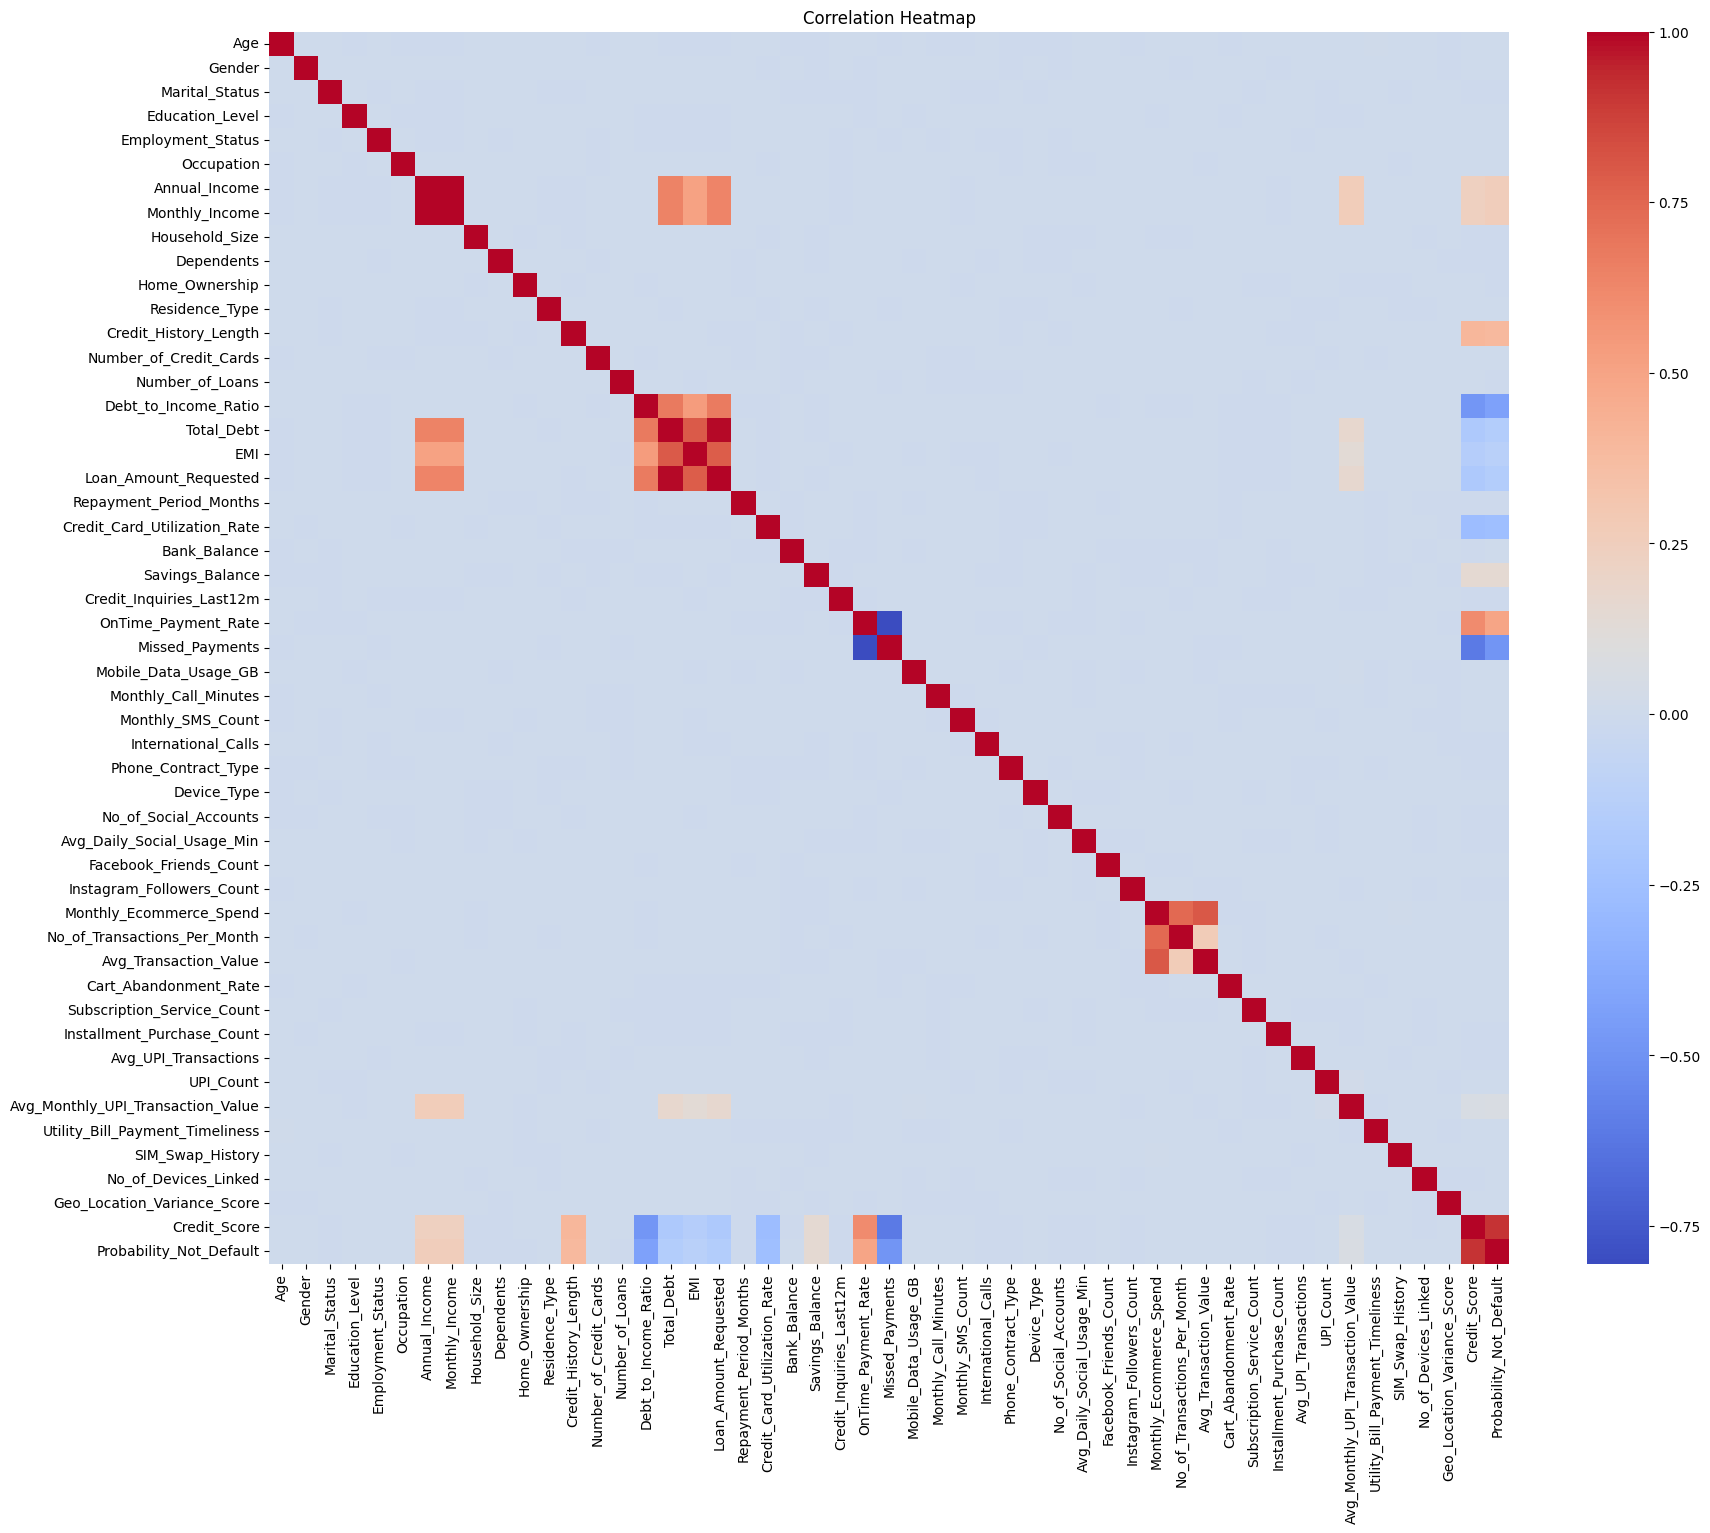

In [13]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 16)) # Adjust figure size as needed
sn.heatmap(corr_matrix, annot=False, cmap='coolwarm') # annot=True to show values, cmap for color map
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Find columns with high correlation (absolute value greater than a threshold, e.g., 0.7)
threshold = 0.7
high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            correlation_value = corr_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, correlation_value))

# Sort pairs by absolute correlation value
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Display the highly correlated pairs
print(f"Columns with absolute correlation greater than {threshold}:")
for col1, col2, correlation_value in high_corr_pairs:
    print(f"- {col1} and {col2}: {correlation_value:.4f}")

Columns with absolute correlation greater than 0.7:
- Monthly_Income and Annual_Income: 1.0000
- Loan_Amount_Requested and Total_Debt: 0.9888
- Probability_Not_Default and Credit_Score: 0.9118
- Missed_Payments and OnTime_Payment_Rate: -0.8052
- Avg_Transaction_Value and Monthly_Ecommerce_Spend: 0.7984
- EMI and Total_Debt: 0.7927
- Loan_Amount_Requested and EMI: 0.7837
- No_of_Transactions_Per_Month and Monthly_Ecommerce_Spend: 0.7408


In [15]:
#Removing Highly correleting features

data= data.drop('Monthly_Income',axis=1)
data= data.drop('No_of_Transactions_Per_Month',axis=1)
data=data.drop('Avg_Transaction_Value',axis = 1)
data= data.drop('Missed_Payments',axis =1)

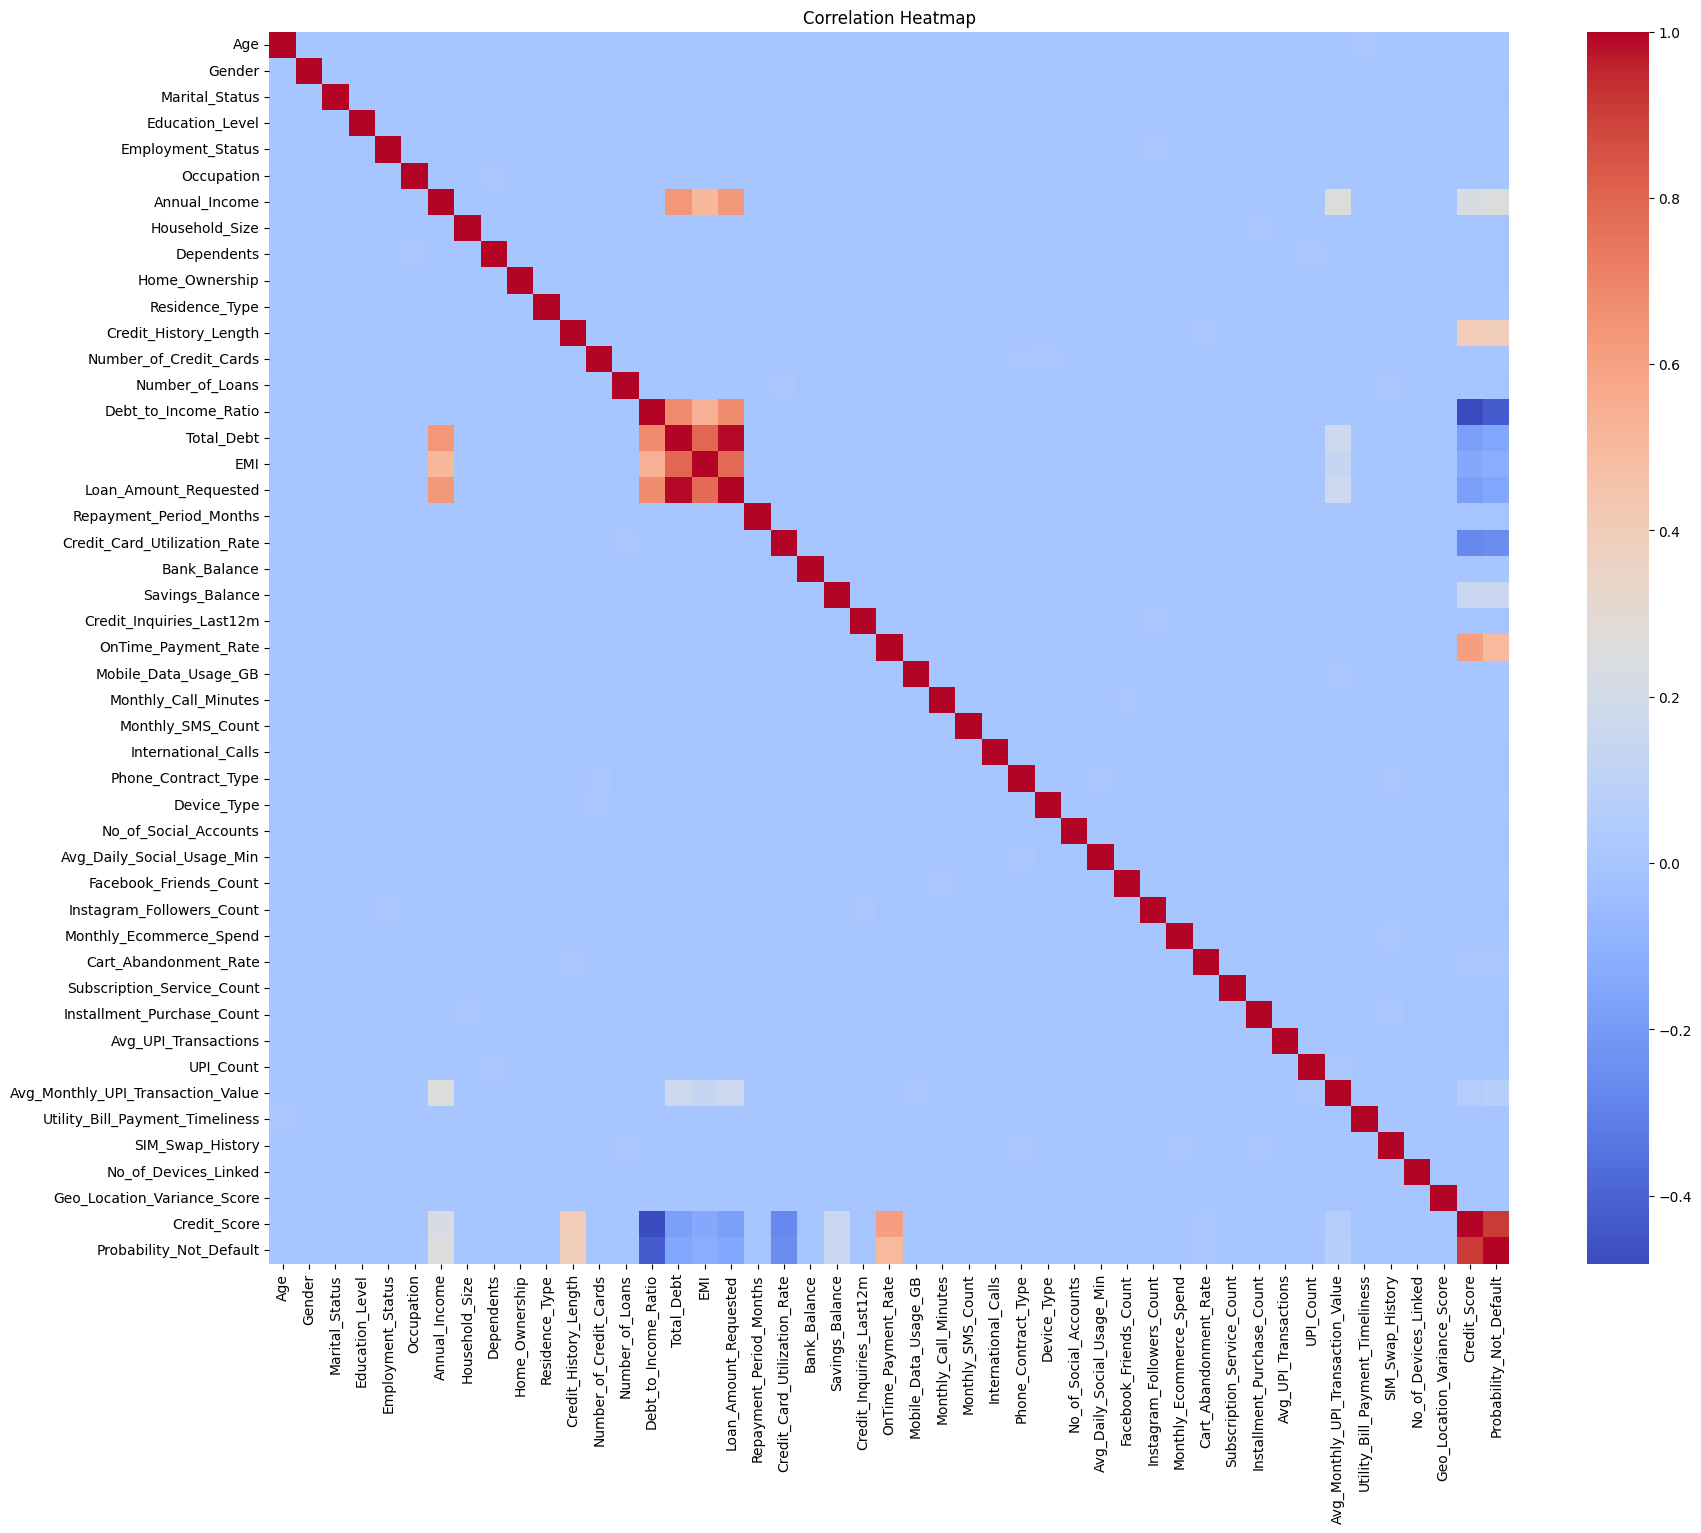

In [16]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 16)) # Adjust figure size as needed
sn.heatmap(corr_matrix, annot=False, cmap='coolwarm') # annot=True to show values, cmap for color map
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Find columns with high correlation (absolute value greater than a threshold, e.g., 0.7)
threshold = 0.1

high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            correlation_value = corr_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, correlation_value))

# Sort pairs by absolute correlation value
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print(len(high_corr_pairs))

# Display the highly correlated pairs
print(f"Columns with absolute correlation greater than {threshold}:")
for col1, col2, correlation_value in high_corr_pairs:
    print(f"- {col1} and {col2}: {correlation_value:.4f}")

32
Columns with absolute correlation greater than 0.1:
- Loan_Amount_Requested and Total_Debt: 0.9888
- Probability_Not_Default and Credit_Score: 0.9118
- EMI and Total_Debt: 0.7927
- Loan_Amount_Requested and EMI: 0.7837
- Total_Debt and Debt_to_Income_Ratio: 0.6802
- Loan_Amount_Requested and Debt_to_Income_Ratio: 0.6727
- Total_Debt and Annual_Income: 0.6411
- Loan_Amount_Requested and Annual_Income: 0.6337
- Credit_Score and OnTime_Payment_Rate: 0.6083
- EMI and Debt_to_Income_Ratio: 0.5379
- EMI and Annual_Income: 0.5078
- Probability_Not_Default and OnTime_Payment_Rate: 0.4956
- Credit_Score and Debt_to_Income_Ratio: -0.4817
- Probability_Not_Default and Debt_to_Income_Ratio: -0.4252
- Credit_Score and Credit_History_Length: 0.4031
- Probability_Not_Default and Credit_History_Length: 0.3879
- Credit_Score and Credit_Card_Utilization_Rate: -0.2722
- Avg_Monthly_UPI_Transaction_Value and Annual_Income: 0.2644
- Probability_Not_Default and Annual_Income: 0.2593
- Probability_Not_Def

In [18]:
# Removing unnesessory column

data = data.drop(['Phone_Contract_Type','Device_Type','Cart_Abandonment_Rate','International_Calls','Geo_Location_Variance_Score'],axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                200000 non-null  float64
 1   Gender                             200000 non-null  int64  
 2   Marital_Status                     200000 non-null  int64  
 3   Education_Level                    200000 non-null  int64  
 4   Employment_Status                  200000 non-null  int64  
 5   Occupation                         200000 non-null  int64  
 6   Annual_Income                      200000 non-null  float64
 7   Household_Size                     200000 non-null  int64  
 8   Dependents                         200000 non-null  int64  
 9   Home_Ownership                     200000 non-null  int64  
 10  Residence_Type                     200000 non-null  int64  
 11  Credit_History_Length              2000

In [41]:
# Separate features and target columns
features = data.drop(['Credit_Score', 'Probability_Not_Default'], axis=1)
targets = data[['Credit_Score', 'Probability_Not_Default']]

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Feature scaling: standardize features for models that benefit from scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler for future
import joblib
joblib.dump(scaler, "scaler.pkl")

features1 = features.drop(['OnTime_Payment_Rate','EMI','Loan_Amount_Requested','Avg_Monthly_UPI_Transaction_Value','Total_Debt','Debt_to_Income_Ratio','Credit_History_Length','Credit_Card_Utilization_Rate','Annual_Income','Savings_Balance'],axis=1)
X_train1, X_test1, y_train, y_test = train_test_split(features1, targets, test_size=0.2, random_state=42)

# Feature scaling: standardize features for models that benefit from scaling
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

In [30]:
print(features.columns)

Index(['Age', 'Gender', 'Marital_Status', 'Education_Level',
       'Employment_Status', 'Occupation', 'Annual_Income', 'Household_Size',
       'Dependents', 'Home_Ownership', 'Residence_Type',
       'Credit_History_Length', 'Number_of_Credit_Cards', 'Number_of_Loans',
       'Debt_to_Income_Ratio', 'Total_Debt', 'EMI', 'Loan_Amount_Requested',
       'Repayment_Period_Months', 'Credit_Card_Utilization_Rate',
       'Bank_Balance', 'Savings_Balance', 'Credit_Inquiries_Last12m',
       'OnTime_Payment_Rate', 'Mobile_Data_Usage_GB', 'Monthly_Call_Minutes',
       'Monthly_SMS_Count', 'No_of_Social_Accounts',
       'Avg_Daily_Social_Usage_Min', 'Facebook_Friends_Count',
       'Instagram_Followers_Count', 'Monthly_Ecommerce_Spend',
       'Subscription_Service_Count', 'Installment_Purchase_Count',
       'Avg_UPI_Transactions', 'UPI_Count',
       'Avg_Monthly_UPI_Transaction_Value', 'Utility_Bill_Payment_Timeliness',
       'SIM_Swap_History', 'No_of_Devices_Linked'],
      dtype='obj

In [21]:
def regression_metrics(y_true, y_pred):
    """
    Calculate MAE, RMSE, and R² for each target in a multi-output regression.
    Returns arrays of metrics for each target.
    """
    mae = mean_absolute_error(y_true, y_pred, multioutput='raw_values')
    mse = mean_squared_error(y_true, y_pred, multioutput='raw_values')
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred, multioutput='raw_values')
    return mae, rmse, r2


def diagnose(train_r2, test_r2, threshold_gap=0.1):
    gap = train_r2 - test_r2
    if train_r2 < 0.3 and test_r2 < 0.3: return "Underfitted"
    if gap > threshold_gap: return "Overfitted"
    return "Well-fitted"

def plot_residuals(y_true, y_pred, model_name):
    """
    Generate residual plots (Predicted vs. Residuals) for each target.
    """
    targets = ['Credit_Score', 'Probability_Not_Default']
    residuals = y_true.values - y_pred
    for i, target in enumerate(targets):
        plt.figure(figsize=(6,4))
        plt.scatter(y_pred[:, i], residuals[:, i], alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel(f'Predicted {target}')
        plt.ylabel('Residual')
        plt.title(f'{model_name} Residuals for {target}')
        plt.show()

def plot_predictions(y_true, y_pred, model_name):
    """
    Plot predicted vs. actual values for each target.
    """
    targets = ['Credit_Score', 'Probability_Not_Default']
    for i, target in enumerate(targets):
        plt.figure(figsize=(6,4))
        plt.scatter(y_true.values[:, i], y_pred[:, i], alpha=0.5)
        min_val = min(y_true.values[:, i].min(), y_pred[:, i].min())
        max_val = max(y_true.values[:, i].max(), y_pred[:, i].max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--')
        plt.xlabel(f'Actual {target}')
        plt.ylabel(f'Predicted {target}')
        plt.title(f'{model_name} Predicted vs Actual for {target}')
        plt.show()


Linear Regression Metrics:
Credit Score -> MAE: 12.35, RMSE: 16.61, R²: 0.919
Prob Not Default -> MAE: 0.017, RMSE: 0.025, R²: 0.742


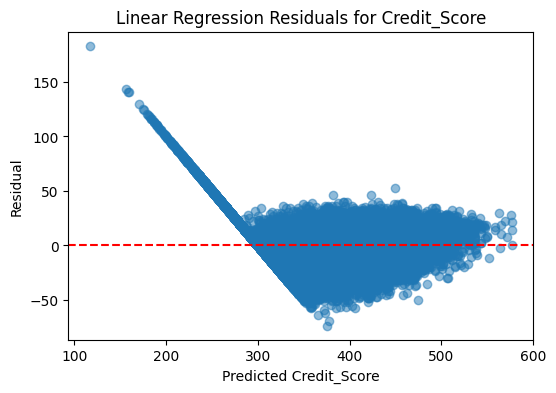

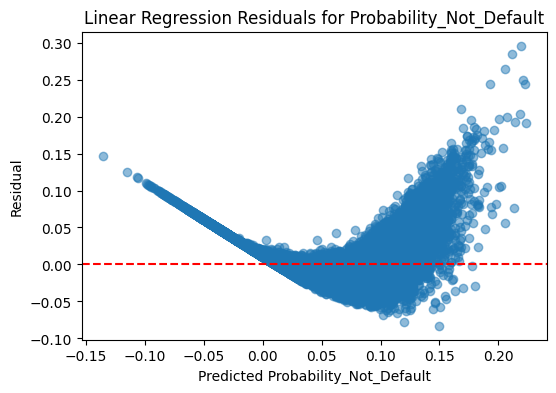

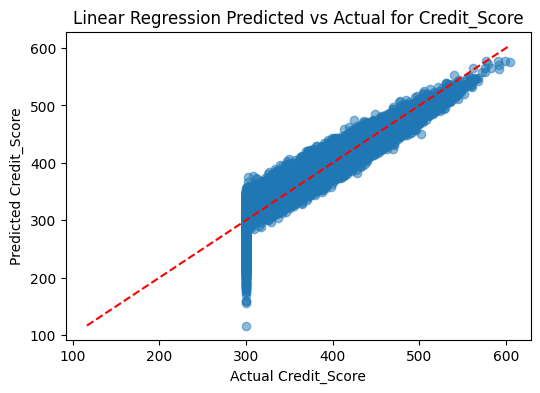

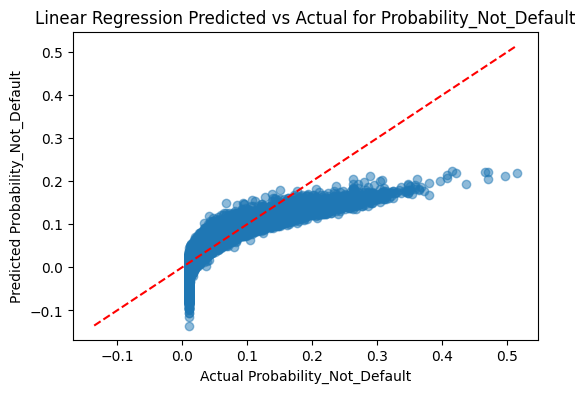

In [22]:
lr_model = LinearRegression()
# Fit model on scaled features
lr_model.fit(X_train_scaled, y_train)
# Predict on test set
lr_pred = lr_model.predict(X_test_scaled)

# Evaluate
lr_mae, lr_rmse, lr_r2 = regression_metrics(y_test, lr_pred)
print("Linear Regression Metrics:")
print(f"Credit Score -> MAE: {lr_mae[0]:.2f}, RMSE: {lr_rmse[0]:.2f}, R²: {lr_r2[0]:.3f}")
print(f"Prob Not Default -> MAE: {lr_mae[1]:.3f}, RMSE: {lr_rmse[1]:.3f}, R²: {lr_r2[1]:.3f}")

# Plot residuals and predictions
plot_residuals(y_test, lr_pred, "Linear Regression")
plot_predictions(y_test, lr_pred, "Linear Regression")


Random Forest Metrics:
Credit Score -> MAE: 11.17, RMSE: 14.55, R²: 0.938
Prob Not Default -> MAE: 0.008, RMSE: 0.013, R²: 0.928


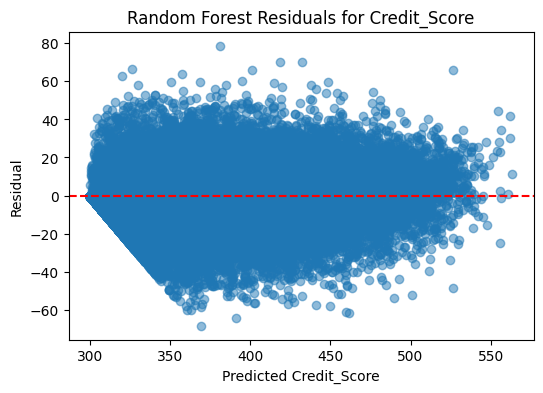

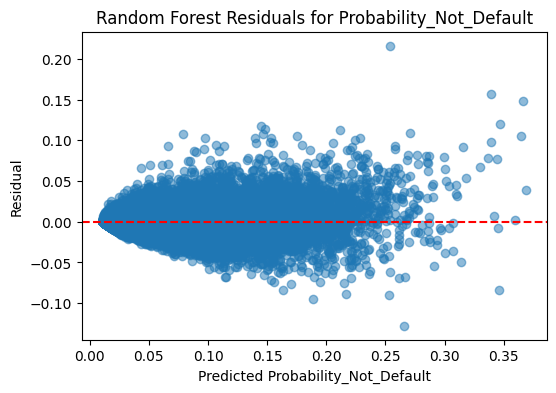

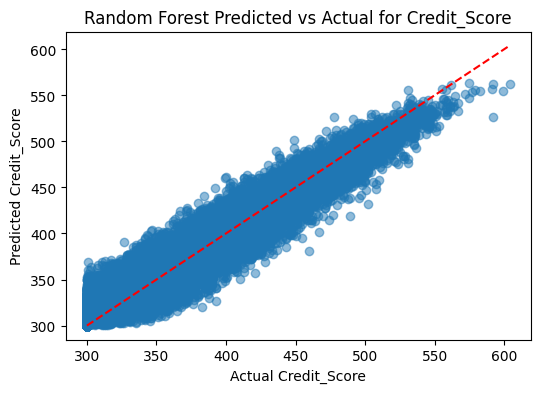

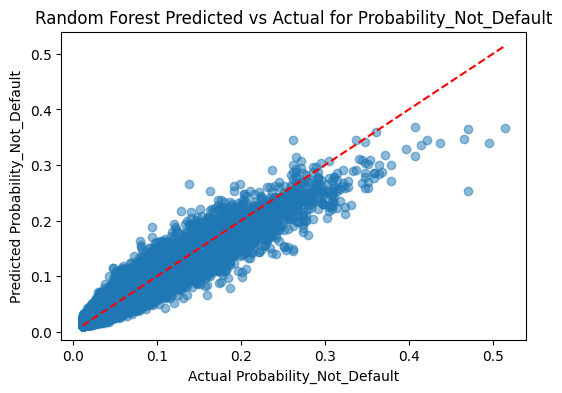

In [27]:
# Initialize and fit model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Ensure predictions have correct shape
if rf_pred.ndim == 1:
    rf_pred = rf_pred.reshape(-1, 1)

# Evaluate
rf_mae, rf_rmse, rf_r2 = regression_metrics(y_test, rf_pred)
print("Random Forest Metrics:")
print(f"Credit Score -> MAE: {rf_mae[0]:.2f}, RMSE: {rf_rmse[0]:.2f}, R²: {rf_r2[0]:.3f}")
print(f"Prob Not Default -> MAE: {rf_mae[1]:.3f}, RMSE: {rf_rmse[1]:.3f}, R²: {rf_r2[1]:.3f}")

plot_residuals(y_test, rf_pred, "Random Forest")
plot_predictions(y_test, rf_pred, "Random Forest")


XGBoost Metrics:
Credit Score -> MAE: 10.59, RMSE: 13.70, R²: 0.945
Prob Not Default -> MAE: 0.008, RMSE: 0.012, R²: 0.940


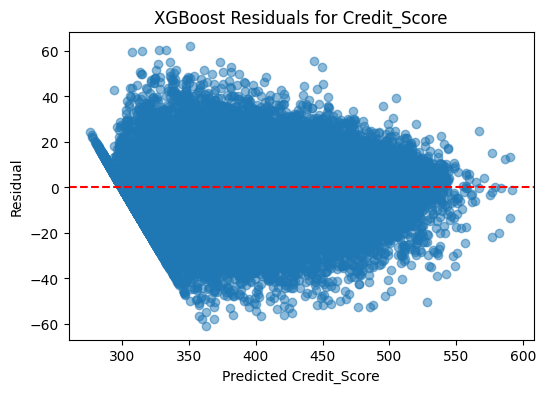

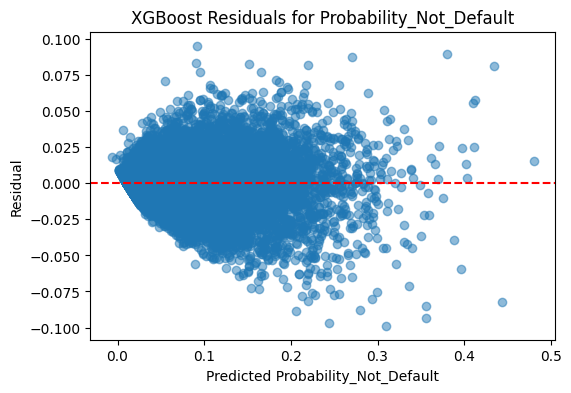

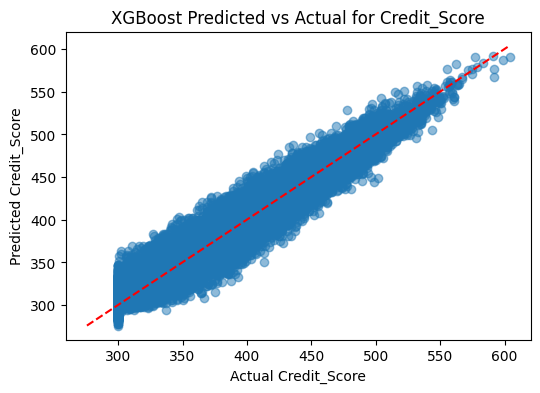

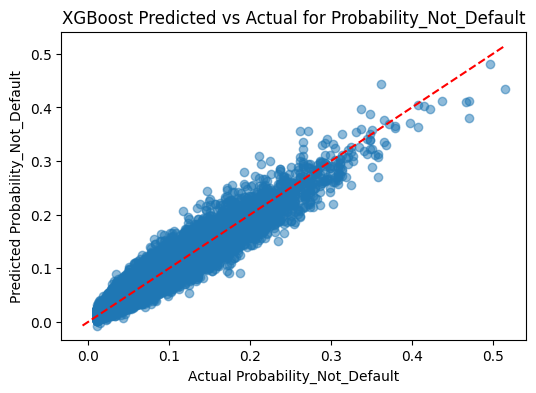

In [23]:
# !pip install xgboost  # Uncomment if XGBoost is not installed
xgb_base = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model = MultiOutputRegressor(xgb_base)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

xgb_mae, xgb_rmse, xgb_r2 = regression_metrics(y_test, xgb_pred)
print("XGBoost Metrics:")
print(f"Credit Score -> MAE: {xgb_mae[0]:.2f}, RMSE: {xgb_rmse[0]:.2f}, R²: {xgb_r2[0]:.3f}")
print(f"Prob Not Default -> MAE: {xgb_mae[1]:.3f}, RMSE: {xgb_rmse[1]:.3f}, R²: {xgb_r2[1]:.3f}")

plot_residuals(y_test, xgb_pred, "XGBoost")
plot_predictions(y_test, xgb_pred, "XGBoost")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4076
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 40
[LightGBM] [Info] Start training from score 388.877856
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4076
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 40
[LightGBM] [Info] Start training from score 0.055312
LightGBM Metrics:
Credit Score -> MAE: 10.18, RMSE: 13.13, R²: 0.949
Prob Not Default -> MAE: 0.008, RMSE: 0.011, R²: 0.948


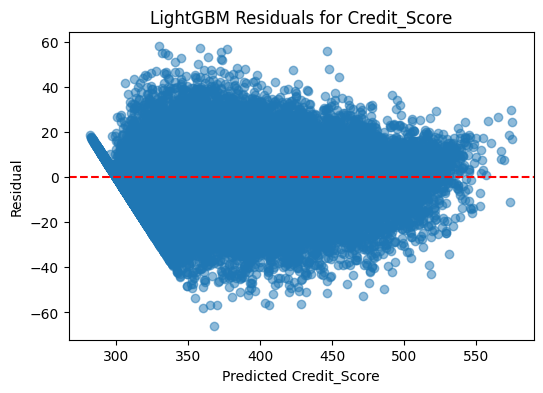

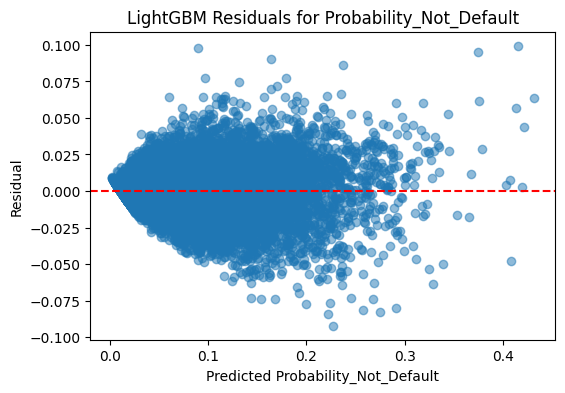

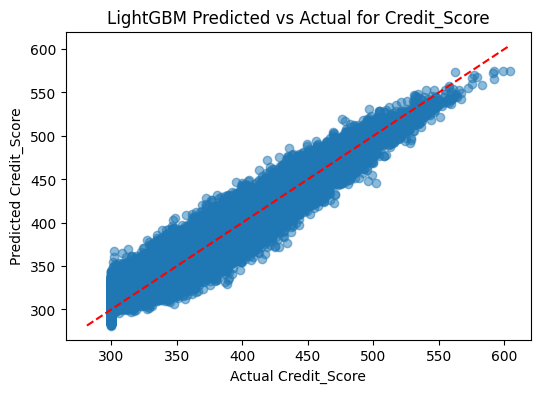

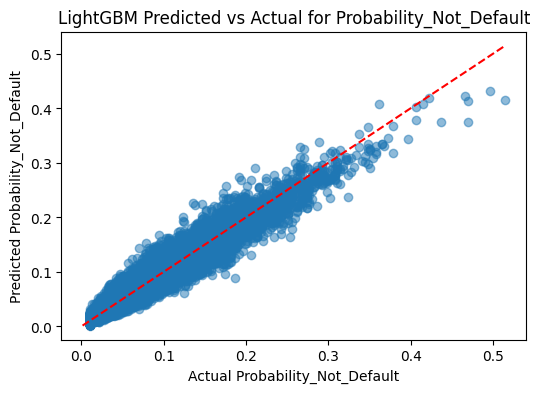

In [24]:
# Create a base LightGBM regressor
lgb_base = lgb.LGBMRegressor(random_state=42, n_estimators=100)

# Wrap it in MultiOutputRegressor to handle both Credit_Score and Probability_Not_Default
lgb_model = MultiOutputRegressor(lgb_base)

# Fit on training data
lgb_model.fit(X_train_scaled, y_train)

# Predict on test set
lgb_pred = lgb_model.predict(X_test_scaled)

# Evaluate
lgb_mae, lgb_rmse, lgb_r2 = regression_metrics(y_test, lgb_pred)
print("LightGBM Metrics:")
print(f"Credit Score -> MAE: {lgb_mae[0]:.2f}, RMSE: {lgb_rmse[0]:.2f}, R²: {lgb_r2[0]:.3f}")
print(f"Prob Not Default -> MAE: {lgb_mae[1]:.3f}, RMSE: {lgb_rmse[1]:.3f}, R²: {lgb_r2[1]:.3f}")

# Visualize
plot_residuals(y_test, lgb_pred, "LightGBM")
plot_predictions(y_test, lgb_pred, "LightGBM")




=== SHAP for target: Credit_Score ===


C:\Users\KIIT\AppData\Local\Temp\ipykernel_24296\1973999010.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, show=False)


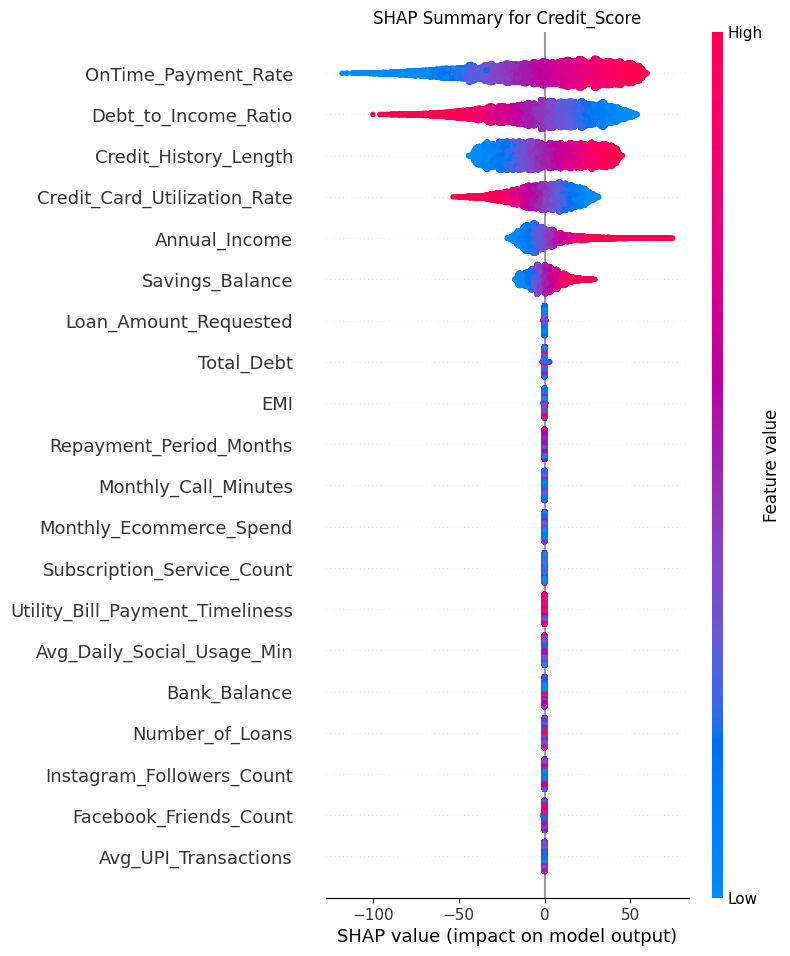

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24296\1973999010.py:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, plot_type="bar", show=False)


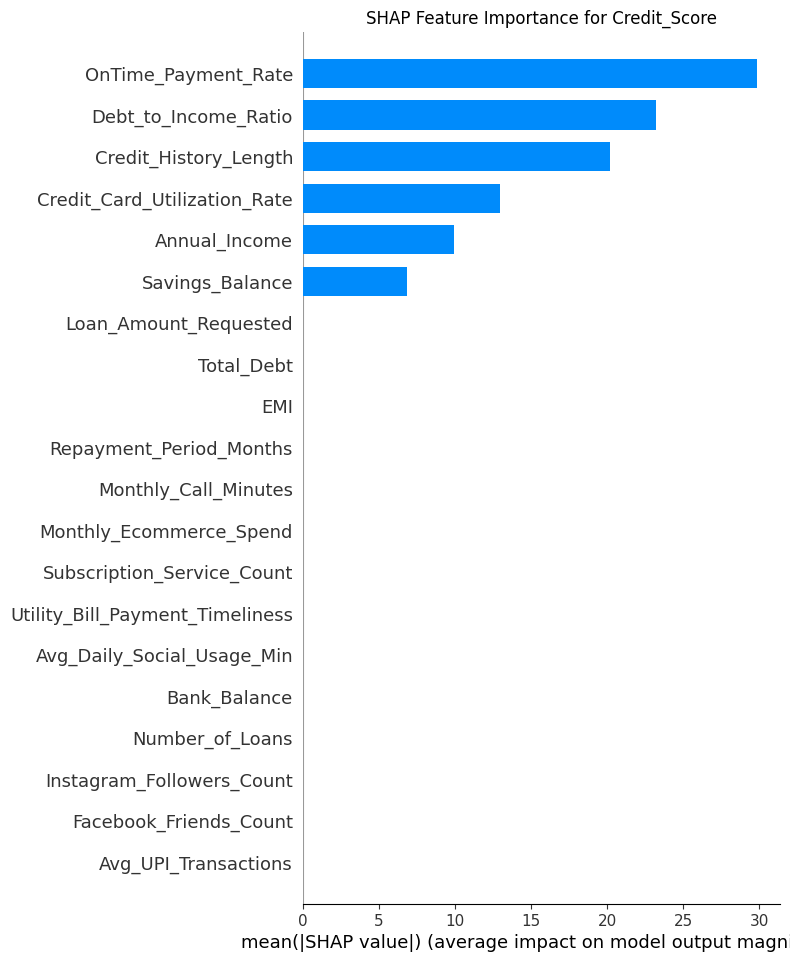

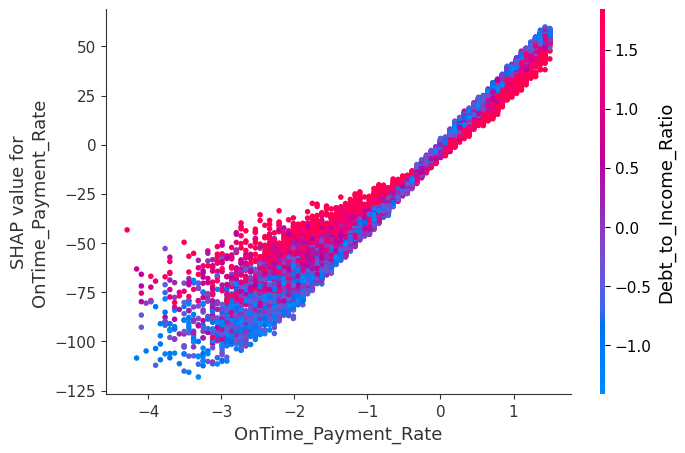


=== SHAP for target: Prob_Not_Default ===


C:\Users\KIIT\AppData\Local\Temp\ipykernel_24296\1973999010.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, show=False)


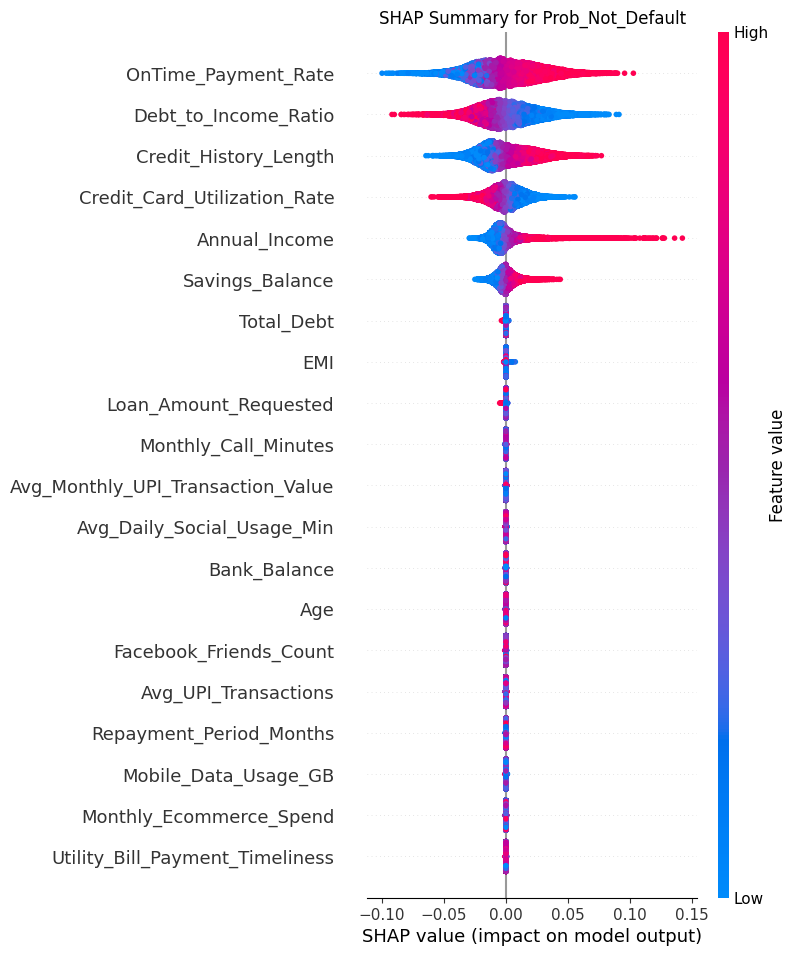

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24296\1973999010.py:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, plot_type="bar", show=False)


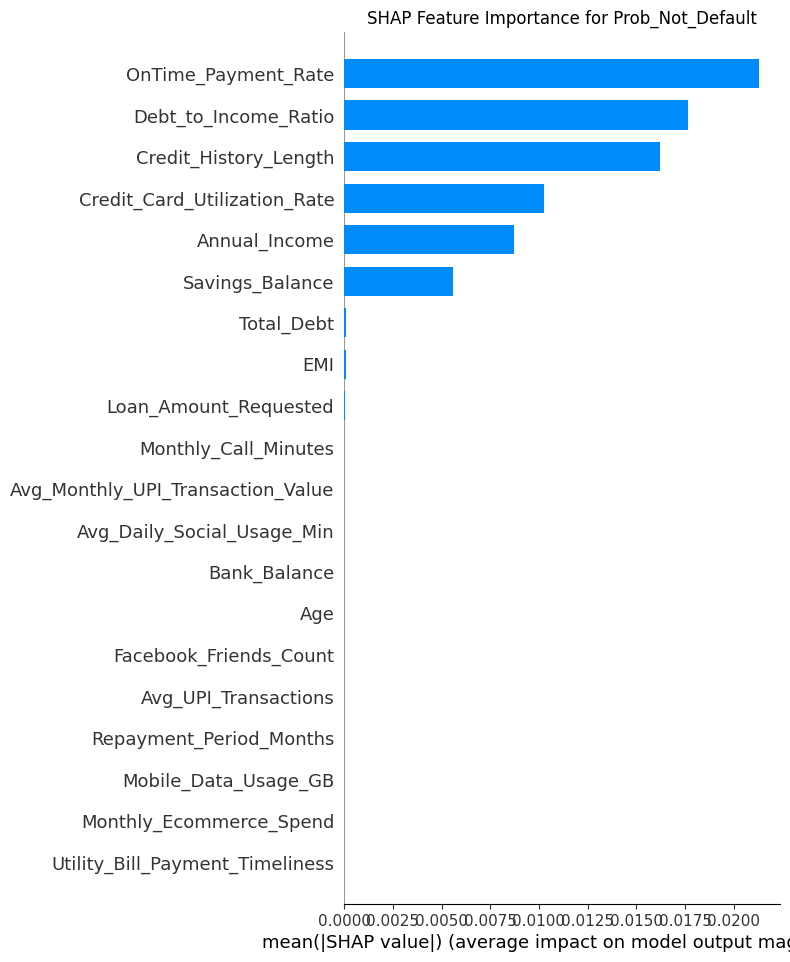

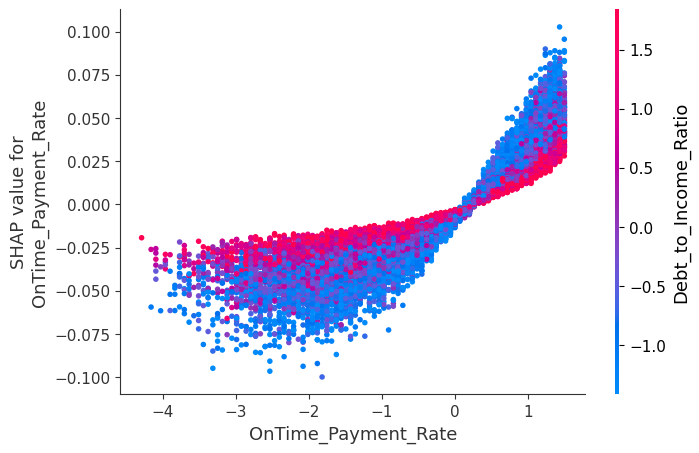

In [29]:
import shap
import lightgbm as lgb
import matplotlib.pyplot as plt

# --- SHAP for MultiOutput LightGBM ---
# Each target has its own estimator inside lgb_model.estimators_
target_names = ["Credit_Score", "Prob_Not_Default"]

for i, est in enumerate(lgb_model.estimators_):
    print(f"\n=== SHAP for target: {target_names[i]} ===")

    # Create TreeExplainer for this LightGBM regressor
    explainer = shap.TreeExplainer(est)
    shap_values = explainer.shap_values(X_test_scaled)

    # Beeswarm (global feature importance)
    shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, show=False)
    plt.title(f"SHAP Summary for {target_names[i]}")
    plt.show()

    # Bar plot (average |SHAP| per feature)
    shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance for {target_names[i]}")
    plt.show()

    # Dependence plot (pick top feature by importance)
    top_feature = X_test.columns[abs(shap_values).mean(0).argmax()]
    shap.dependence_plot(top_feature, shap_values, X_test_scaled, feature_names=X_test.columns)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2231
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 30
[LightGBM] [Info] Start training from score 388.877856
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2231
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 30
[LightGBM] [Info] Start training from score 0.055312
LightGBM Metrics:
Credit Score -> MAE: 48.60, RMSE: 58.40, R²: -0.001
Prob Not Default -> MAE: 0.036, RMSE: 0.048, R²: -0.003


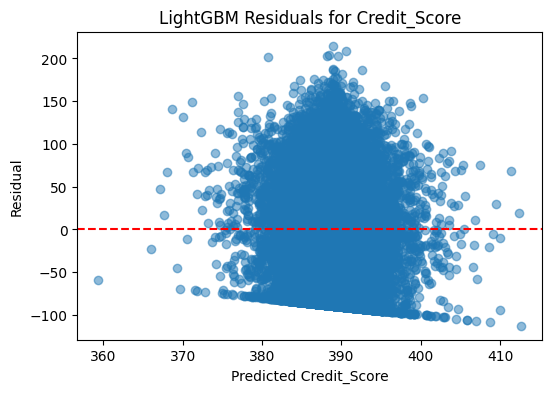

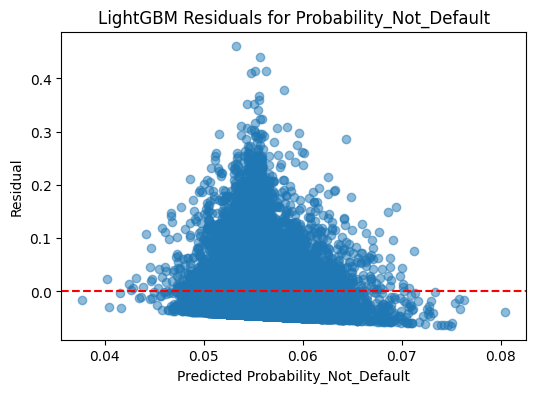

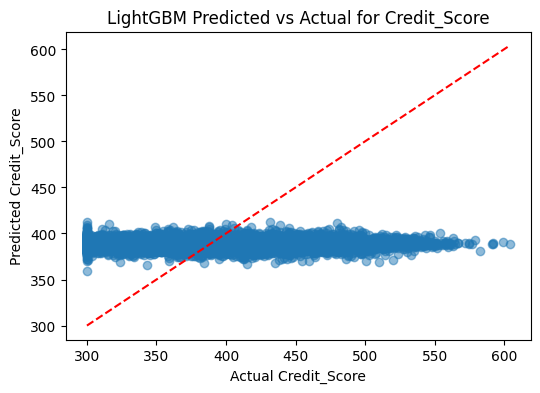

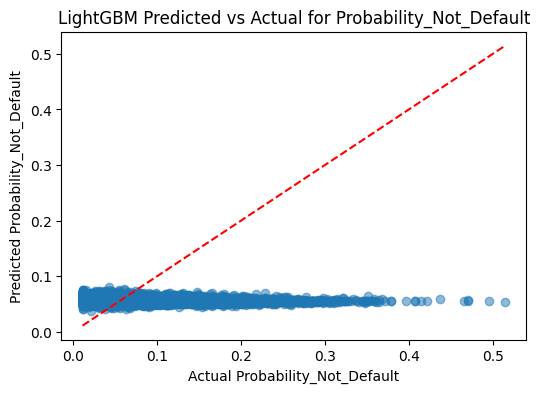

In [42]:
# Create a base LightGBM regressor
lgb_base1 = lgb.LGBMRegressor(random_state=42, n_estimators=100)

# Wrap it in MultiOutputRegressor to handle both Credit_Score and Probability_Not_Default
lgb_model1 = MultiOutputRegressor(lgb_base1)

# Fit on training data
lgb_model1.fit(X_train_scaled1, y_train)

# Predict on test set
lgb_pred1 = lgb_model1.predict(X_test_scaled1)

# Evaluate
lgb_mae1, lgb_rmse1, lgb_r21 = regression_metrics(y_test, lgb_pred1)
print("LightGBM Metrics:")
print(f"Credit Score -> MAE: {lgb_mae1[0]:.2f}, RMSE: {lgb_rmse1[0]:.2f}, R²: {lgb_r21[0]:.3f}")
print(f"Prob Not Default -> MAE: {lgb_mae1[1]:.3f}, RMSE: {lgb_rmse1[1]:.3f}, R²: {lgb_r21[1]:.3f}")

# Visualize
plot_residuals(y_test, lgb_pred1, "LightGBM")
plot_predictions(y_test, lgb_pred1, "LightGBM")




=== SHAP for target: Credit_Score ===


C:\Users\KIIT\AppData\Local\Temp\ipykernel_24296\322169153.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled1, feature_names=X_test1.columns, show=False)


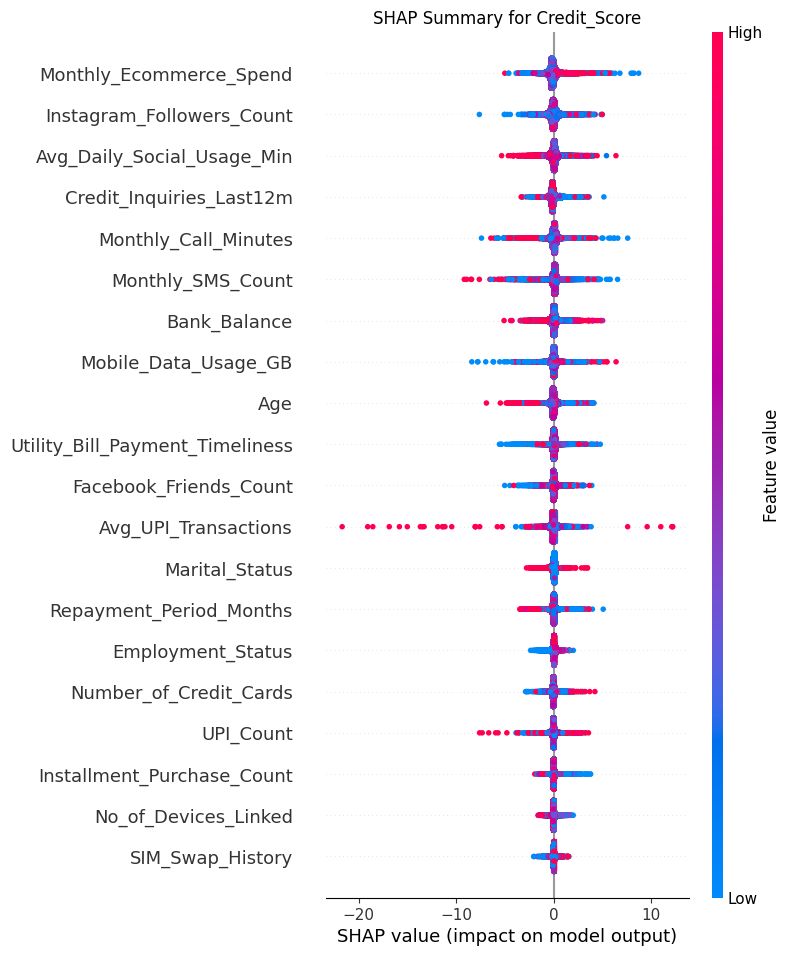

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24296\322169153.py:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled1, feature_names=X_test1.columns, plot_type="bar", show=False)


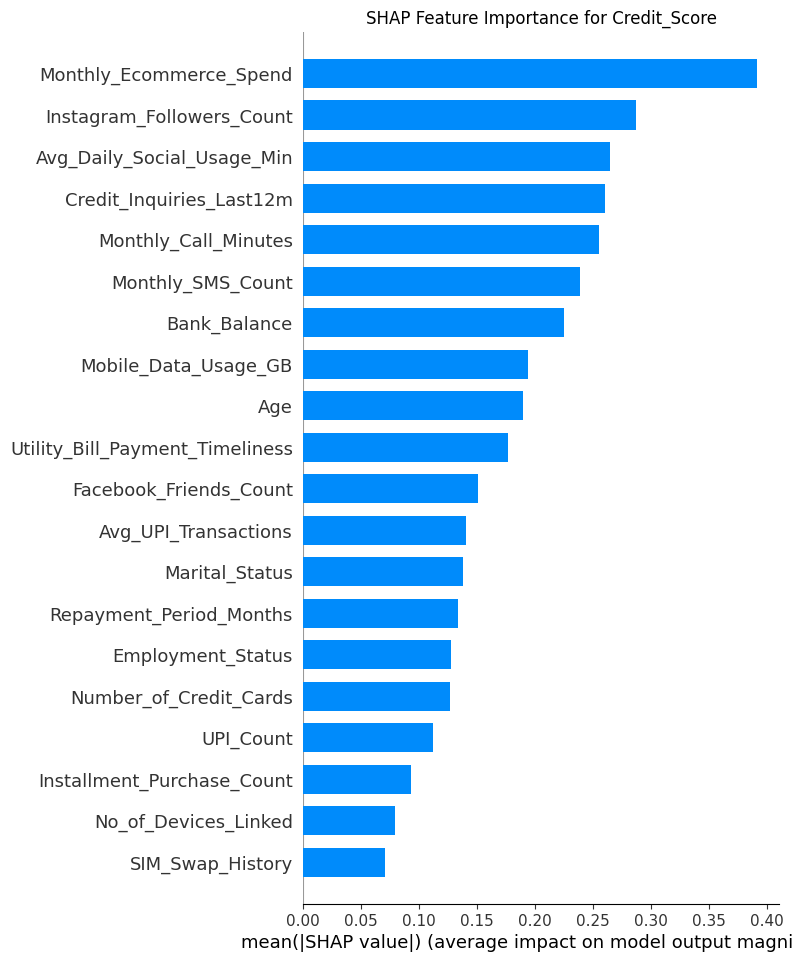

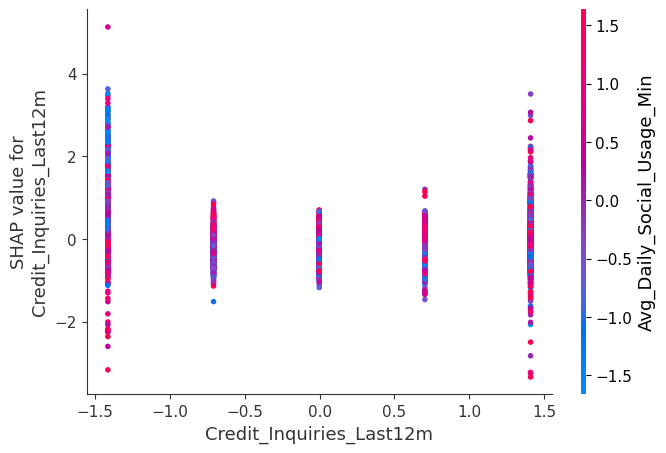


=== SHAP for target: Prob_Not_Default ===


C:\Users\KIIT\AppData\Local\Temp\ipykernel_24296\322169153.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled1, feature_names=X_test1.columns, show=False)


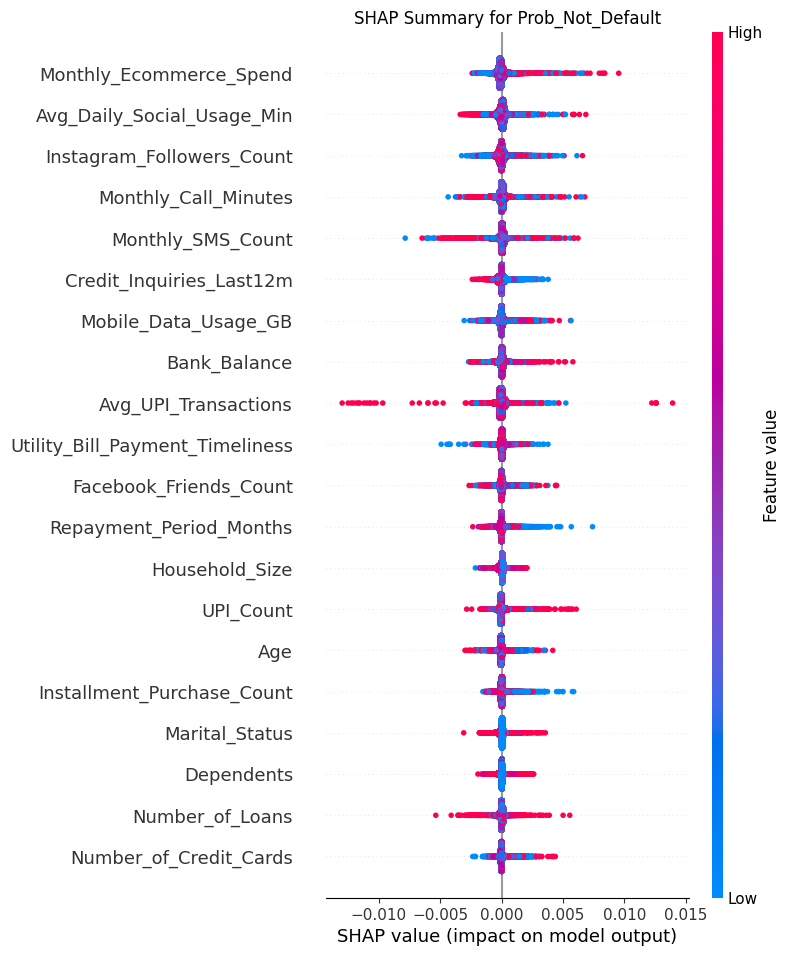

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24296\322169153.py:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled1, feature_names=X_test1.columns, plot_type="bar", show=False)


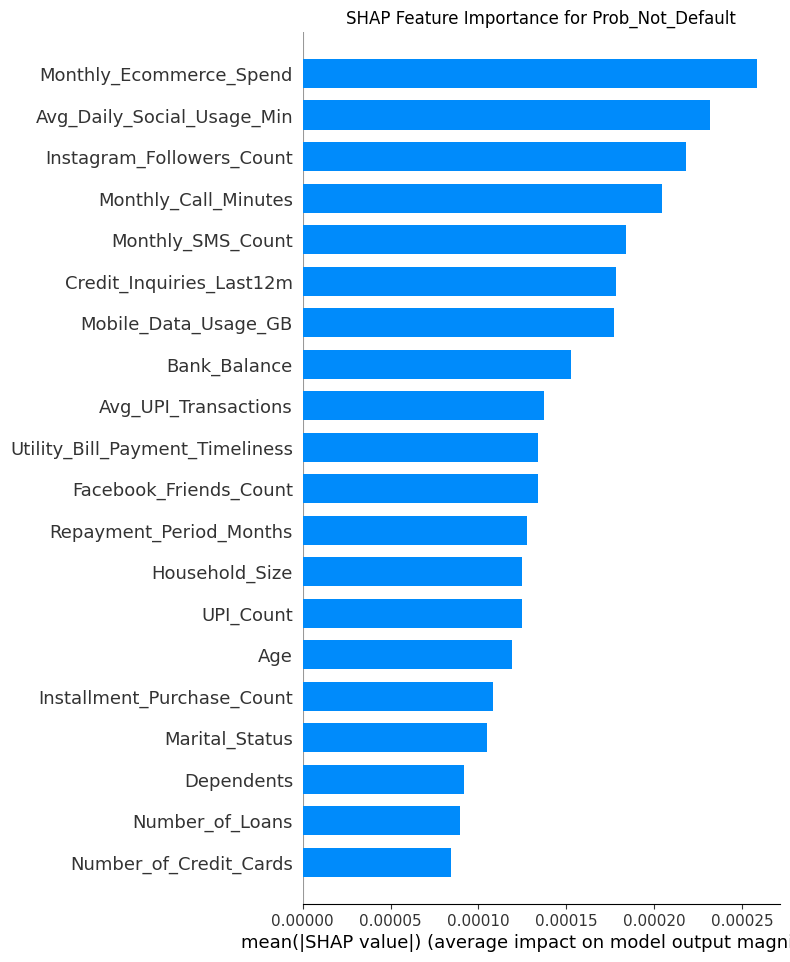

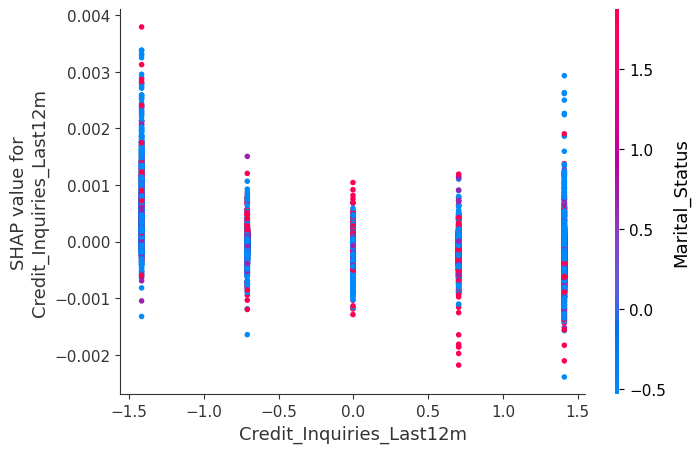

In [43]:
import shap
import lightgbm as lgb
import matplotlib.pyplot as plt

# --- SHAP for MultiOutput LightGBM ---
# Each target has its own estimator inside lgb_model.estimators_
target_names = ["Credit_Score", "Prob_Not_Default"]

for i, est in enumerate(lgb_model1.estimators_):
    print(f"\n=== SHAP for target: {target_names[i]} ===")

    # Create TreeExplainer for this LightGBM regressor
    explainer = shap.TreeExplainer(est)
    shap_values = explainer.shap_values(X_test_scaled1)

    # Beeswarm (global feature importance)
    shap.summary_plot(shap_values, X_test_scaled1, feature_names=X_test1.columns, show=False)
    plt.title(f"SHAP Summary for {target_names[i]}")
    plt.show()

    # Bar plot (average |SHAP| per feature)
    shap.summary_plot(shap_values, X_test_scaled1, feature_names=X_test1.columns, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance for {target_names[i]}")
    plt.show()

    # Dependence plot (pick top feature by importance)
    top_feature = X_test.columns[abs(shap_values).mean(0).argmax()]
    shap.dependence_plot(top_feature, shap_values, X_test_scaled1, feature_names=X_test1.columns)


In [25]:
import pickle

# Save model
with open("lightgbm_model.pkl", "wb") as f:
    pickle.dump(lgb_model, f)

# Load model
with open("lightgbm_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Make prediction
y_pred = loaded_model.predict(X_test)
print(y_pred[:5])


[[5.24988623e+02 2.25374458e-01]
 [5.23541164e+02 2.13068957e-01]
 [5.17995559e+02 1.83894166e-01]
 [5.19456302e+02 2.32410258e-01]
 [5.19246948e+02 2.14498549e-01]]


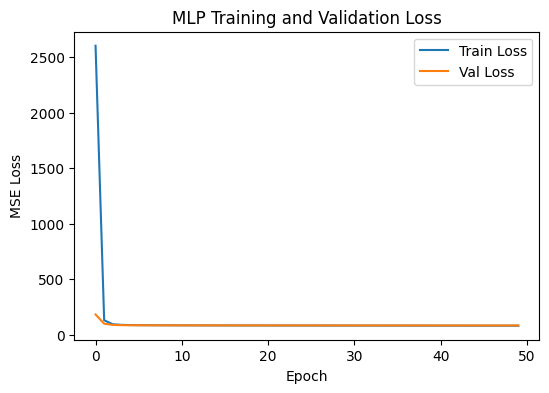

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MLP Neural Network Metrics:
Credit Score -> MAE: 9.70, RMSE: 12.77, R²: 0.952
Prob Not Default -> MAE: 0.044, RMSE: 0.055, R²: -0.277


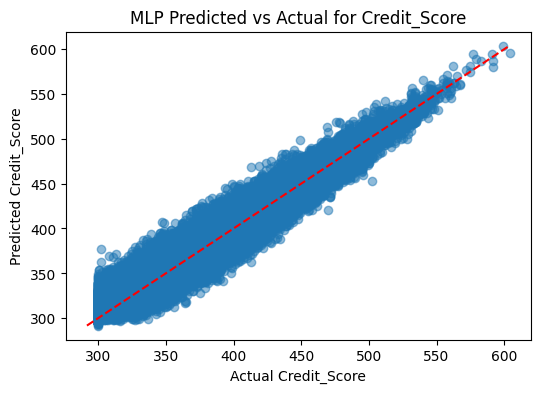

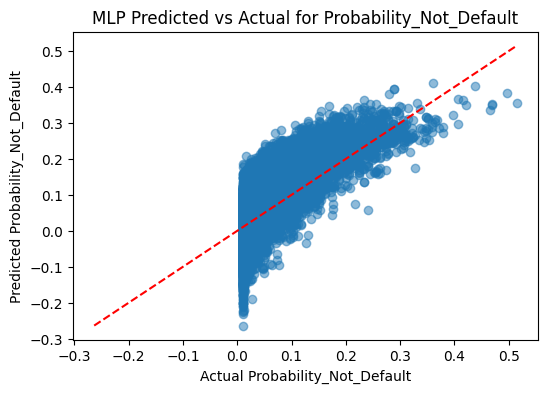

In [26]:
mlp_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2)  # two outputs for multi-target regression
])
mlp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history_mlp = mlp_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2, epochs=50, batch_size=32,
    callbacks=[early_stop], verbose=0
)

# Plot training curve
plt.figure(figsize=(6,4))
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('MSE Loss')
plt.title('MLP Training and Validation Loss')
plt.legend(); plt.show()

# Evaluate on test set
mlp_pred = mlp_model.predict(X_test_scaled)
mlp_mae, mlp_rmse, mlp_r2 = regression_metrics(y_test, mlp_pred)
print("MLP Neural Network Metrics:")
print(f"Credit Score -> MAE: {mlp_mae[0]:.2f}, RMSE: {mlp_rmse[0]:.2f}, R²: {mlp_r2[0]:.3f}")
print(f"Prob Not Default -> MAE: {mlp_mae[1]:.3f}, RMSE: {mlp_rmse[1]:.3f}, R²: {mlp_r2[1]:.3f}")

plot_predictions(y_test, mlp_pred, "MLP")


In [ ]:
# Reshape features for CNN input: (samples, timesteps, features)
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

cnn_model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(2)
])
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_cnn = cnn_model.fit(
    X_train_cnn, y_train,
    validation_split=0.2, epochs=50, batch_size=32,
    callbacks=[early_stop], verbose=0
)

plt.figure(figsize=(6,4))
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('MSE Loss')
plt.title('CNN Training and Validation Loss')
plt.legend(); plt.show()

cnn_pred = cnn_model.predict(X_test_cnn)
cnn_mae, cnn_rmse, cnn_r2 = regression_metrics(y_test, cnn_pred)
print("CNN Neural Network Metrics:")
print(f"Credit Score -> MAE: {cnn_mae[0]:.2f}, RMSE: {cnn_rmse[0]:.2f}, R²: {cnn_r2[0]:.3f}")
print(f"Prob Not Default -> MAE: {cnn_mae[1]:.3f}, RMSE: {cnn_rmse[1]:.3f}, R²: {cnn_r2[1]:.3f}")

plot_predictions(y_test, cnn_pred, "CNN")


In [ ]:
# Reshape input for LSTM: (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

lstm_model = Sequential([
    Input(shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='tanh'),
    Dense(2)
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_lstm = lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.2, epochs=50, batch_size=32,
    callbacks=[early_stop], verbose=0
)

plt.figure(figsize=(6,4))
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('MSE Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend(); plt.show()

lstm_pred = lstm_model.predict(X_test_lstm)
lstm_mae, lstm_rmse, lstm_r2 = regression_metrics(y_test, lstm_pred)
print("LSTM Neural Network Metrics:")
print(f"Credit Score -> MAE: {lstm_mae[0]:.2f}, RMSE: {lstm_rmse[0]:.2f}, R²: {lstm_r2[0]:.3f}")
print(f"Prob Not Default -> MAE: {lstm_mae[1]:.3f}, RMSE: {lstm_rmse[1]:.3f}, R²: {lstm_r2[1]:.3f}")

plot_predictions(y_test, lstm_pred, "LSTM")


In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'LIGHTGBM' ,'MLP', 'CNN', 'LSTM'],
    'MAE (Credit Score)': [lr_mae[0], rf_mae[0], xgb_mae[0], lgb_mae[0] , mlp_mae[0], cnn_mae[0], lstm_mae[0]],
    'RMSE (Credit Score)': [lr_rmse[0], rf_rmse[0], xgb_rmse[0] , lgb_rmse[0] , mlp_rmse[0], cnn_rmse[0], lstm_rmse[0]],
    'R² (Credit Score)': [lr_r2[0], rf_r2[0], xgb_r2[0], lgb_r2[0] , mlp_r2[0], cnn_r2[0], lstm_r2[0]],
    'MAE (Prob Not Default)': [lr_mae[1], rf_mae[1], xgb_mae[1],  lgb_mae[0] ,mlp_mae[1], cnn_mae[1], lstm_mae[1]],
    'RMSE (Prob Not Default)': [lr_rmse[1], rf_rmse[1], xgb_rmse[1], lgb_rmse[1] , mlp_rmse[1], cnn_rmse[1], lstm_rmse[1]],
    'R² (Prob Not Default)': [lr_r2[1], rf_r2[1], xgb_r2[1], lgb_r2[1] , mlp_r2[1], cnn_r2[1], lstm_r2[1]]
})
print("\\nModel Performance Comparison")
display(results)


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    """Train vs Test metrics and diagnosis"""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mae, train_rmse, train_r2 = regression_metrics(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = regression_metrics(y_test, y_test_pred)

    def diagnose(r2_train, r2_test, threshold_gap=0.1):
        gap = r2_train - r2_test
        if r2_train < 0.3 and r2_test < 0.3: return "Underfitted"
        if gap > threshold_gap: return "Overfitted"
        return "Well-fitted"

    diagnosis = [diagnose(train_r2[i], test_r2[i]) for i in range(2)]

    print(f"\n{name} Train vs Test:")
    print(f"Credit Score -> Train R²: {train_r2[0]:.3f}, Test R²: {test_r2[0]:.3f}, Diagnosis: {diagnosis[0]}")
    print(f"Probability  -> Train R²: {train_r2[1]:.3f}, Test R²: {test_r2[1]:.3f}, Diagnosis: {diagnosis[1]}")

    return {
        "Model": name,
        "Train_R2_CS": train_r2[0], "Test_R2_CS": test_r2[0], "Diagnosis_CS": diagnosis[0],
        "Train_R2_Prob": train_r2[1], "Test_R2_Prob": test_r2[1], "Diagnosis_Prob": diagnosis[1]
    }


In [ ]:
def cross_val_metrics(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    maes, rmses, r2s = [], [], []
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        maes.append(mean_absolute_error(y_val, y_pred, multioutput='raw_values'))
        rmses.append(np.sqrt(mean_squared_error(y_val, y_pred, multioutput='raw_values')))
        r2s.append(r2_score(y_val, y_pred, multioutput='raw_values'))
    
    return {
        'MAE': np.mean(maes, axis=0),
        'RMSE': np.mean(rmses, axis=0),
        'R2': np.mean(r2s, axis=0)
    }


In [ ]:
# Load the dataset
df = data

# Features and targets
X = df.iloc[:, :-2].values
y = df.iloc[:, -2:].values  # [Credit_Score, Probability_Not_Default]


In [ ]:
models = {
    'Linear Regression': MultiOutputRegressor(LinearRegression()),
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)),
    'XGBoost': MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    'LightGBM': MultiOutputRegressor(LGBMRegressor(n_estimators=100, random_state=42))
}

cv_results = []

for name, model in models.items():
    metrics = cross_val_metrics(model, X, y, cv=5)
    cv_results.append({
        'Model': name,
        'MAE (Credit_Score)': metrics['MAE'][0],
        'MAE (Probability_Not_Default)': metrics['MAE'][1],
        'RMSE (Credit_Score)': metrics['RMSE'][0],
        'RMSE (Probability_Not_Default)': metrics['RMSE'][1],
        'R2 (Credit_Score)': metrics['R2'][0],
        'R2 (Probability_Not_Default)': metrics['R2'][1],
    })


In [ ]:
cv_df = pd.DataFrame(cv_results)
display(cv_df.round(4))

